## Scrapping data

In [1]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
import contractions
import re

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

In [3]:
scrapreview = reviews_all(
    app_id='com.openai.chatgpt',  # ID aplikasi
    lang='en',  # defaults to ‘en’
    country='us',  # defaults to ‘us’
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    filter_score_with=None  # defaults to None (means all score)
)

In [4]:
chatgptapp_reviewdf = pd.DataFrame(scrapreview)
chatgptapp_reviewdf

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c625b2b7-4654-43f1-abaa-bee778fee9f2,Steve,https://play-lh.googleusercontent.com/a-/ALV-U...,This is amazing technology. What it needs righ...,3,526,1.2023.307,2023-11-09 00:07:34,None,NaT,1.2023.307
1,507c0764-d039-445e-8920-c9119728493b,Roc Ferguson,https://play-lh.googleusercontent.com/a-/ALV-U...,"so far, the new function to be able to speak t...",5,80,1.2023.313,2023-11-22 13:47:43,None,NaT,1.2023.313
2,9fb61d81-5cd2-4cb0-9e4f-26f9fd636474,Rayan Najjar,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dear openai, This app is gorgeous all around, ...",4,234,1.2023.307,2023-11-05 21:15:00,None,NaT,1.2023.307
3,5e2f5f6f-065d-4e18-b2c3-320b270b8e86,Shawn White,https://play-lh.googleusercontent.com/a/ACg8oc...,"Most useful application ever, by far. Most peo...",5,4,1.2023.313,2023-11-24 01:29:31,None,NaT,1.2023.313
4,7670563b-4420-478b-85cb-38d27c9f09f5,Ricardo A,https://play-lh.googleusercontent.com/a-/ALV-U...,"The speech feature is amazing, very convincing...",4,39,1.2023.307,2023-11-12 04:46:16,None,NaT,1.2023.307
...,...,...,...,...,...,...,...,...,...,...,...
39161,e49cc721-c04b-4b01-b532-3285a9661a32,G G,https://play-lh.googleusercontent.com/a-/ALV-U...,❤️❤️❤️❤️,5,0,None,2023-07-25 22:11:59,None,NaT,None
39162,479f78e9-24fc-4609-9d0c-82eb07140327,Kanhaiya Lal Kanhaiya Lal,https://play-lh.googleusercontent.com/a/ACg8oc...,❣️❣️❣️❣️,5,0,None,2023-10-19 07:20:49,None,NaT,None
39163,cda7e188-5067-43d0-82fe-19afa4946ba7,Fatima Zahra Filali,https://play-lh.googleusercontent.com/a-/ALV-U...,❤️❤️,5,0,None,2023-11-17 21:32:47,None,NaT,None
39164,f6f1563d-a0cf-452b-b34c-d2e0fe34c0d0,SONU U S,https://play-lh.googleusercontent.com/a-/ALV-U...,⚡️,5,0,None,2023-07-26 00:35:41,None,NaT,None


In [5]:
chatgptapp_reviewdf.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Cleaning data

In [6]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [7]:
gpt_app = chatgptapp_reviewdf.copy()
gpt_app = gpt_app.loc[:, ['content', 'score', 'thumbsUpCount']]
gpt_app['content'] = gpt_app['content'].apply(lambda x: remove_emoji(x))
gpt_app['content'] = gpt_app['content'].str.replace(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+', '') #menghapus tulisan berbahasa arab
gpt_app = gpt_app.replace('', pd.NA)
gpt_app

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\1301180420.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  gpt_app['content'] = gpt_app['content'].str.replace(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+', '') #menghapus tulisan berbahasa arab


,content,score,thumbsUpCount
0,This is amazing technology. What it needs righ...,3,526
1,"so far, the new function to be able to speak t...",5,80
2,"Dear openai, This app is gorgeous all around, ...",4,234
3,"Most useful application ever, by far. Most peo...",5,4
4,"The speech feature is amazing, very convincing...",4,39
...,...,...,...
39161,<NA>,5,0
39162,<NA>,5,0
39163,<NA>,5,0
39164,<NA>,5,0


In [8]:
missing_values = gpt_app.isnull().sum()
print(missing_values)

content          605
score              0
thumbsUpCount      0
dtype: int64


In [9]:
gpt_app = gpt_app.dropna()
gpt_app

,content,score,thumbsUpCount
0,This is amazing technology. What it needs righ...,3,526
1,"so far, the new function to be able to speak t...",5,80
2,"Dear openai, This app is gorgeous all around, ...",4,234
3,"Most useful application ever, by far. Most peo...",5,4
4,"The speech feature is amazing, very convincing...",4,39
...,...,...,...
39128,Hum First,5,0
39131,Wooow....,5,0
39152,Wow.....,5,0
39153,Noice,5,0


In [10]:
gpt_app.shape

(38561, 3)

## Preparing data
    - Expanding contractions
    - Removing punctuations
    - Converting to lowercase
    - Performing tokenization
    - Removing stop words

#### Expanding contractions

In [11]:
# Function to expand contractions in a given text
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Apply the function to the 'content' column
gpt_app['expanded_content'] = gpt_app['content'].apply(expand_contractions)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\2567714886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['expanded_content'] = gpt_app['content'].apply(expand_contractions)


,content,score,thumbsUpCount,expanded_content
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing..."


In [12]:
def remove_punctuations(text):
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    return text_no_punct

# Apply the function to the 'expanded_content' column
gpt_app['no_punctuations'] = gpt_app['expanded_content'].apply(remove_punctuations)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\1446579104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['no_punctuations'] = gpt_app['expanded_content'].apply(remove_punctuations)


,content,score,thumbsUpCount,expanded_content,no_punctuations
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...


In [13]:
def convert_to_lowercase(text):
    text_lower = text.lower()
    return text_lower

# Apply the function to the 'no_punctuations' column
gpt_app['lowercase_content'] = gpt_app['no_punctuations'].apply(convert_to_lowercase)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\3886918566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['lowercase_content'] = gpt_app['no_punctuations'].apply(convert_to_lowercase)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...


In [14]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply the function to the 'lowercase_content' column
gpt_app['tokens'] = gpt_app['lowercase_content'].apply(tokenize_text)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\3395555998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['tokens'] = gpt_app['lowercase_content'].apply(tokenize_text)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv..."


In [15]:
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the function to the 'tokens_no_stop' column
gpt_app['cleaned_review'] = gpt_app['tokens'].apply(join_tokens)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\4246480337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['cleaned_review'] = gpt_app['tokens'].apply(join_tokens)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...


### Mengecek berapa banyak stop words

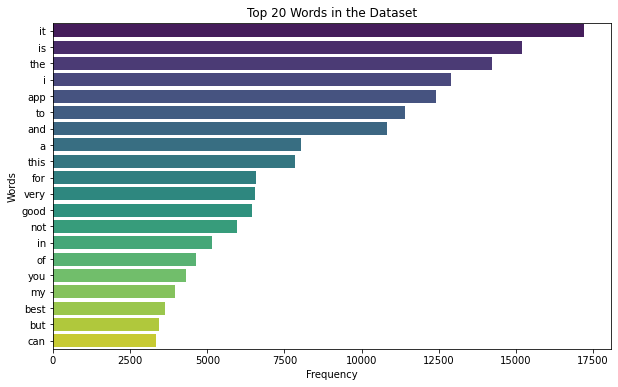

In [16]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]
all_words = combine_words(gpt_app['tokens'])
all_words_df = pd.DataFrame(all_words, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_df, palette='viridis')
plt.title('Top 20 Words in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [17]:
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in tokens if token not in stop_words]
    return tokens_no_stop

# Apply the function to the 'tokens' column
gpt_app['tokens_without_stop'] = gpt_app['tokens'].apply(remove_stop_words)
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\4261095146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['tokens_without_stop'] = gpt_app['tokens'].apply(remove_stop_words)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human..."


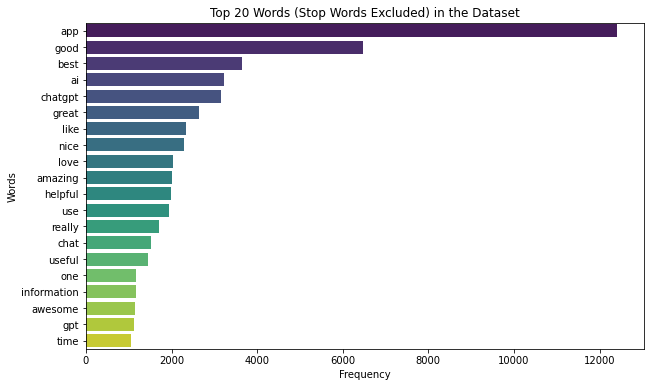

In [18]:
all_words_without_stop = combine_words(gpt_app['tokens_without_stop'])
top_words_without_stop_df = pd.DataFrame(all_words_without_stop, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words_without_stop_df, palette='viridis')
plt.title('Top 20 Words (Stop Words Excluded) in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [19]:
def join_tokens_without_stop(tokens):
    return ' '.join(tokens)

# Apply the function to the 'tokens_no_stop' column
gpt_app['cleaned_review_without_stop'] = gpt_app['tokens_without_stop'].apply(join_tokens_without_stop)
gpt_app

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\3532811525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['cleaned_review_without_stop'] = gpt_app['tokens_without_stop'].apply(join_tokens_without_stop)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...
...,...,...,...,...,...,...,...,...,...,...
39128,Hum First,5,0,Hum First,Hum First,hum first,"[hum, first]",hum first,"[hum, first]",hum first
39131,Wooow....,5,0,Wooow....,Wooow,wooow,[wooow],wooow,[wooow],wooow
39152,Wow.....,5,0,Wow.....,Wow,wow,[wow],wow,[wow],wow
39153,Noice,5,0,Noice,Noice,noice,[noice],noice,[noice],noice


In [20]:
gpt_app.columns

Index(['content', 'score', 'thumbsUpCount', 'expanded_content',
       'no_punctuations', 'lowercase_content', 'tokens', 'cleaned_review',
       'tokens_without_stop', 'cleaned_review_without_stop'],
      dtype='object')

In [21]:
gpt_app_clean = gpt_app.copy()
gpt_app_clean = gpt_app_clean[['content', 'score', 'thumbsUpCount', 'cleaned_review', 'cleaned_review_without_stop']]
gpt_app_clean

,content,score,thumbsUpCount,cleaned_review,cleaned_review_without_stop
0,This is amazing technology. What it needs righ...,3,526,this is amazing technology what it needs right...,amazing technology needs right give user contr...
1,"so far, the new function to be able to speak t...",5,80,so far the new function to be able to speak to...,far new function able speak app amazing much i...
2,"Dear openai, This app is gorgeous all around, ...",4,234,dear openai this app is gorgeous all around th...,dear openai app gorgeous around though experie...
3,"Most useful application ever, by far. Most peo...",5,4,most useful application ever by far most peopl...,useful application ever far peoples complaints...
4,"The speech feature is amazing, very convincing...",4,39,the speech feature is amazing very convincingl...,speech feature amazing convincingly human dial...
...,...,...,...,...,...
39128,Hum First,5,0,hum first,hum first
39131,Wooow....,5,0,wooow,wooow
39152,Wow.....,5,0,wow,wow
39153,Noice,5,0,noice,noice


disini saya membuat sebuah variabel "gpt_app_clean" untuk menyimpan teks yang telah dibersikan melalui proses2 sebelumnya agar lebih mudah dalam membacanya dan mengetahui perbedaanya.

sedangkan variabel "gpt_app" digunakan untuk pemrosesan data mulai dari awal hingga akhir, dalam arti "gpt_app" digunakan untuk mengutak atik teks yang dianalisis dari langkah awal hingga langkah terakhir.

### Analyze part of speech

In [22]:
gpt_app['pos_tags'] = gpt_app['tokens_without_stop'].apply(pos_tag)
gpt_app

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\3837327433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['pos_tags'] = gpt_app['tokens_without_stop'].apply(pos_tag)


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop,pos_tags
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...,"[(amazing, VBG), (technology, NN), (needs, NNS..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...,"[(far, RB), (new, JJ), (function, NN), (able, ..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[(dear, JJ), (openai, NN), (app, RB), (gorgeou..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...,"[(useful, JJ), (application, NN), (ever, RB), ..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...,"[(speech, NN), (feature, NN), (amazing, VBG), ..."
...,...,...,...,...,...,...,...,...,...,...,...
39128,Hum First,5,0,Hum First,Hum First,hum first,"[hum, first]",hum first,"[hum, first]",hum first,"[(hum, NN), (first, RB)]"
39131,Wooow....,5,0,Wooow....,Wooow,wooow,[wooow],wooow,[wooow],wooow,"[(wooow, NN)]"
39152,Wow.....,5,0,Wow.....,Wow,wow,[wow],wow,[wow],wow,"[(wow, NN)]"
39153,Noice,5,0,Noice,Noice,noice,[noice],noice,[noice],noice,"[(noice, NN)]"


In [23]:
#ambil yang merupakan adjective
gpt_app['adjectives'] = gpt_app['pos_tags'].apply(lambda x: [word for word, tag in x if tag.startswith('JJ') and word not in ['i'] and word not in ['app'] and word not in ['ai']])
gpt_app

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\1939008968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['adjectives'] = gpt_app['pos_tags'].apply(lambda x: [word for word, tag in x if tag.startswith('JJ') and word not in ['i'] and word not in ['app'] and word not in ['ai']])


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop,pos_tags,adjectives
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...,"[(amazing, VBG), (technology, NN), (needs, NNS...","[right, audio, idealy, broken, foreign]"
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...,"[(far, RB), (new, JJ), (function, NN), (able, ...","[new, able, much, intuitive, virtual, direct, ..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[(dear, JJ), (openai, NN), (app, RB), (gorgeou...","[dear, gorgeous, first, important, polish, aud..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...,"[(useful, JJ), (application, NN), (ever, RB), ...","[useful, dynamite, little, little, convenient]"
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...,"[(speech, NN), (feature, NN), (amazing, VBG), ...","[human, silent, nonsense, text, randomness, cr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39128,Hum First,5,0,Hum First,Hum First,hum first,"[hum, first]",hum first,"[hum, first]",hum first,"[(hum, NN), (first, RB)]",[]
39131,Wooow....,5,0,Wooow....,Wooow,wooow,[wooow],wooow,[wooow],wooow,"[(wooow, NN)]",[]
39152,Wow.....,5,0,Wow.....,Wow,wow,[wow],wow,[wow],wow,"[(wow, NN)]",[]
39153,Noice,5,0,Noice,Noice,noice,[noice],noice,[noice],noice,"[(noice, NN)]",[]


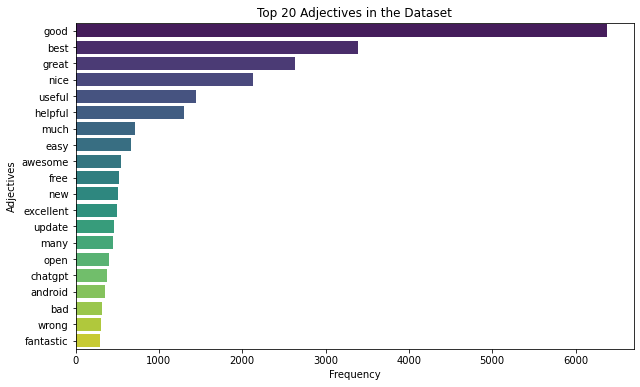

In [24]:
all_adjectives = combine_words(gpt_app['adjectives'])
all_adjectives_words_df = pd.DataFrame(all_adjectives, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_adjectives_words_df, palette='viridis')
plt.title('Top 20 Adjectives in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.show()

### Performing stemming and lemmatization

In [25]:
#membuat steaming
porter_stemmer = PorterStemmer()
gpt_app['stemmed_tokens'] = gpt_app['tokens_without_stop'].apply(lambda x: [porter_stemmer.stem(word) for word in x])
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\1439034730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['stemmed_tokens'] = gpt_app['tokens_without_stop'].apply(lambda x: [porter_stemmer.stem(word) for word in x])


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop,pos_tags,adjectives,stemmed_tokens
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...,"[(amazing, VBG), (technology, NN), (needs, NNS...","[right, audio, idealy, broken, foreign]","[amaz, technolog, need, right, give, user, con..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...,"[(far, RB), (new, JJ), (function, NN), (able, ...","[new, able, much, intuitive, virtual, direct, ...","[far, new, function, abl, speak, app, amaz, mu..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[(dear, JJ), (openai, NN), (app, RB), (gorgeou...","[dear, gorgeous, first, important, polish, aud...","[dear, openai, app, gorgeou, around, though, e..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...,"[(useful, JJ), (application, NN), (ever, RB), ...","[useful, dynamite, little, little, convenient]","[use, applic, ever, far, peopl, complaint, foc..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...,"[(speech, NN), (feature, NN), (amazing, VBG), ...","[human, silent, nonsense, text, randomness, cr...","[speech, featur, amaz, convincingli, human, di..."


In [26]:
#membuat lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('JJ'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
lemmatizer = WordNetLemmatizer()
gpt_app['lemmatized_tokens'] = gpt_app['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in x])
gpt_app

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\310581272.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['lemmatized_tokens'] = gpt_app['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in x])


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop,pos_tags,adjectives,stemmed_tokens,lemmatized_tokens
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...,"[(amazing, VBG), (technology, NN), (needs, NNS...","[right, audio, idealy, broken, foreign]","[amaz, technolog, need, right, give, user, con...","[amaze, technology, need, right, give, user, c..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...,"[(far, RB), (new, JJ), (function, NN), (able, ...","[new, able, much, intuitive, virtual, direct, ...","[far, new, function, abl, speak, app, amaz, mu...","[far, new, function, able, speak, app, amaze, ..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[(dear, JJ), (openai, NN), (app, RB), (gorgeou...","[dear, gorgeous, first, important, polish, aud...","[dear, openai, app, gorgeou, around, though, e...","[dear, openai, app, gorgeous, around, though, ..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...,"[(useful, JJ), (application, NN), (ever, RB), ...","[useful, dynamite, little, little, convenient]","[use, applic, ever, far, peopl, complaint, foc...","[useful, application, ever, far, people, compl..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...,"[(speech, NN), (feature, NN), (amazing, VBG), ...","[human, silent, nonsense, text, randomness, cr...","[speech, featur, amaz, convincingli, human, di...","[speech, feature, amaze, convincingly, human, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39128,Hum First,5,0,Hum First,Hum First,hum first,"[hum, first]",hum first,"[hum, first]",hum first,"[(hum, NN), (first, RB)]",[],"[hum, first]","[hum, first]"
39131,Wooow....,5,0,Wooow....,Wooow,wooow,[wooow],wooow,[wooow],wooow,"[(wooow, NN)]",[],[wooow],[wooow]
39152,Wow.....,5,0,Wow.....,Wow,wow,[wow],wow,[wow],wow,"[(wow, NN)]",[],[wow],[wow]
39153,Noice,5,0,Noice,Noice,noice,[noice],noice,[noice],noice,"[(noice, NN)]",[],[noic],[noice]


C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\3502342769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['lemmatized_review'] = gpt_app['lemmatized_tokens'].apply(lambda x: ' '.join(x))


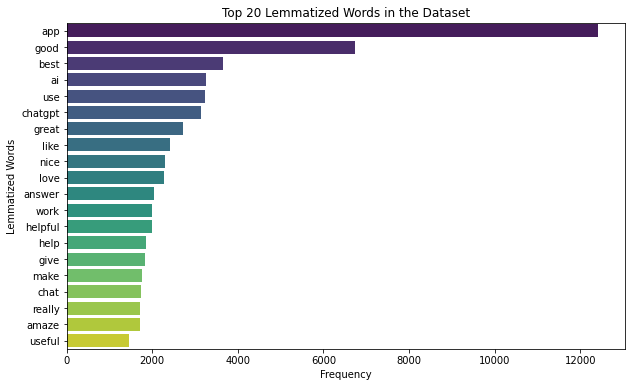

In [27]:
gpt_app['lemmatized_review'] = gpt_app['lemmatized_tokens'].apply(lambda x: ' '.join(x))

all_lemmatized_words = combine_words(gpt_app['lemmatized_tokens'])
top_lemmatized_df = pd.DataFrame(all_lemmatized_words, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_lemmatized_df, palette='viridis')
plt.title('Top 20 Lemmatized Words in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Lemmatized Words')
plt.show()

### Analisis Ngram

In [28]:
# membuat analisis Ngram
def extract_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    n_gram_list = [' '.join(gram) for gram in n_grams]
    return n_gram_list

# membuat bigrams
gpt_app['token_ngram'] = gpt_app['tokens_without_stop'].apply(lambda x: extract_ngrams(x, 2))
gpt_app.head()

C:\Users\azkiii\AppData\Local\Temp\ipykernel_61384\60115076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt_app['token_ngram'] = gpt_app['tokens_without_stop'].apply(lambda x: extract_ngrams(x, 2))


,content,score,thumbsUpCount,expanded_content,no_punctuations,lowercase_content,tokens,cleaned_review,tokens_without_stop,cleaned_review_without_stop,pos_tags,adjectives,stemmed_tokens,lemmatized_tokens,lemmatized_review,token_ngram
0,This is amazing technology. What it needs righ...,3,526,This is amazing technology. What it needs righ...,This is amazing technology What it needs right...,this is amazing technology what it needs right...,"[this, is, amazing, technology, what, it, need...",this is amazing technology what it needs right...,"[amazing, technology, needs, right, give, user...",amazing technology needs right give user contr...,"[(amazing, VBG), (technology, NN), (needs, NNS...","[right, audio, idealy, broken, foreign]","[amaz, technolog, need, right, give, user, con...","[amaze, technology, need, right, give, user, c...",amaze technology need right give user control ...,"[amazing technology, technology needs, needs r..."
1,"so far, the new function to be able to speak t...",5,80,"so far, the new function to be able to speak t...",so far the new function to be able to speak to...,so far the new function to be able to speak to...,"[so, far, the, new, function, to, be, able, to...",so far the new function to be able to speak to...,"[far, new, function, able, speak, app, amazing...",far new function able speak app amazing much i...,"[(far, RB), (new, JJ), (function, NN), (able, ...","[new, able, much, intuitive, virtual, direct, ...","[far, new, function, abl, speak, app, amaz, mu...","[far, new, function, able, speak, app, amaze, ...",far new function able speak app amaze much int...,"[far new, new function, function able, able sp..."
2,"Dear openai, This app is gorgeous all around, ...",4,234,"Dear openai, This app is gorgeous all around, ...",Dear openai This app is gorgeous all around th...,dear openai this app is gorgeous all around th...,"[dear, openai, this, app, is, gorgeous, all, a...",dear openai this app is gorgeous all around th...,"[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[(dear, JJ), (openai, NN), (app, RB), (gorgeou...","[dear, gorgeous, first, important, polish, aud...","[dear, openai, app, gorgeou, around, though, e...","[dear, openai, app, gorgeous, around, though, ...",dear openai app gorgeous around though experie...,"[dear openai, openai app, app gorgeous, gorgeo..."
3,"Most useful application ever, by far. Most peo...",5,4,"Most useful application ever, by far. Most peo...",Most useful application ever by far Most peopl...,most useful application ever by far most peopl...,"[most, useful, application, ever, by, far, mos...",most useful application ever by far most peopl...,"[useful, application, ever, far, peoples, comp...",useful application ever far peoples complaints...,"[(useful, JJ), (application, NN), (ever, RB), ...","[useful, dynamite, little, little, convenient]","[use, applic, ever, far, peopl, complaint, foc...","[useful, application, ever, far, people, compl...",useful application ever far people complaint f...,"[useful application, application ever, ever fa..."
4,"The speech feature is amazing, very convincing...",4,39,"The speech feature is amazing, very convincing...",The speech feature is amazing very convincingl...,the speech feature is amazing very convincingl...,"[the, speech, feature, is, amazing, very, conv...",the speech feature is amazing very convincingl...,"[speech, feature, amazing, convincingly, human...",speech feature amazing convincingly human dial...,"[(speech, NN), (feature, NN), (amazing, VBG), ...","[human, silent, nonsense, text, randomness, cr...","[speech, featur, amaz, convincingli, human, di...","[speech, feature, amaze, convincingly, human, ...",speech feature amaze convincingly human dialog...,"[speech feature, feature amazing, amazing conv..."


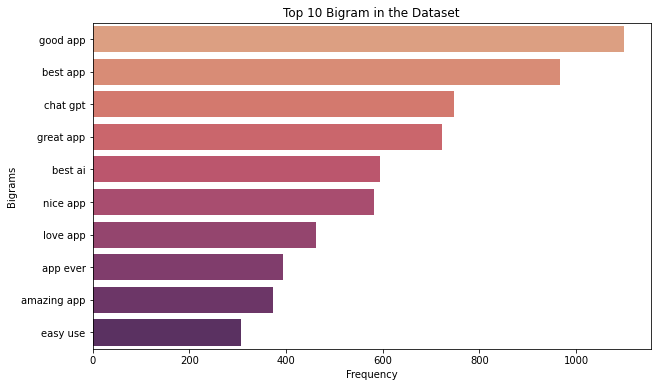

In [29]:
Ngram_comb = combine_words(gpt_app['token_ngram'])
top_bigrams_df = pd.DataFrame(Ngram_comb, columns=['word']).value_counts().reset_index(name='count').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_bigrams_df, palette='flare')
plt.title('Top 10 Bigram in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

### Words CLoud

In [34]:
#pip install wordcloud

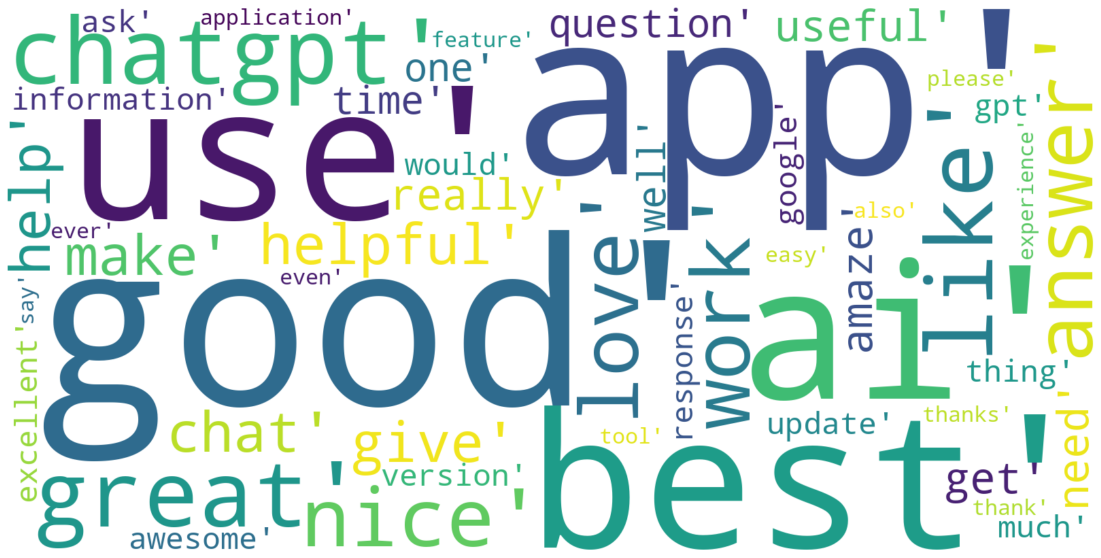

In [30]:
def combine_words_cloud(word_list):
  all_words = []
  for word in word_list:
     all_words += word
  return all_words

word_for_cloud = combine_words(gpt_app['lemmatized_tokens'])
mostcommon = FreqDist(word_for_cloud).most_common(50)
font_path = None
wordcloud = WordCloud(width=1600, height=800, background_color='white', font_path=font_path).generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
